In [2]:
import pandas as pd
import numpy as np        # for mathematical calculation
import matplotlib.pyplot as plt     # for graphs
from datetime import datetime     # to access datetime
from pandas import Series          # to work on series
%matplotlib inline      
import warnings                   
warnings.filterwarnings("ignore")    # to ignore warnings

In [47]:
train = pd.read_csv("Train_SU63ISt.csv") 
test = pd.read_csv("Test_0qrQsBZ.csv")

In [48]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [49]:
# making a copy of original datasets so that we dont loose our original data
train_original = train.copy()
test_original = test.copy()

In [50]:
print(train.columns)
print(test.columns)

Index(['ID', 'Datetime', 'Count'], dtype='object')
Index(['ID', 'Datetime'], dtype='object')


In [51]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [52]:
train.shape,test.shape

((18288, 3), (5112, 2))

We will extract the time and date from the Datetime. We have seen earlier that the data type of Datetime is object. So first of all we have to change the data type to datetime format otherwise we can not extract features from it.

In [53]:
train['Datetime'] = pd.to_datetime(train.Datetime,format= '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime,format= '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format= '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format= '%d-%m-%Y %H:%M')

In [54]:
for i in (train,test,test_original,train_original):
    i['year']= i.Datetime.dt.year
    i['month']= i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [55]:
train.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [56]:
train['day of week']= train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [57]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek ==6:
        return 1
    else :
        return 0
    
temp2 =  train['Datetime'].apply(applyer)
train['weekend']= temp2

In [61]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


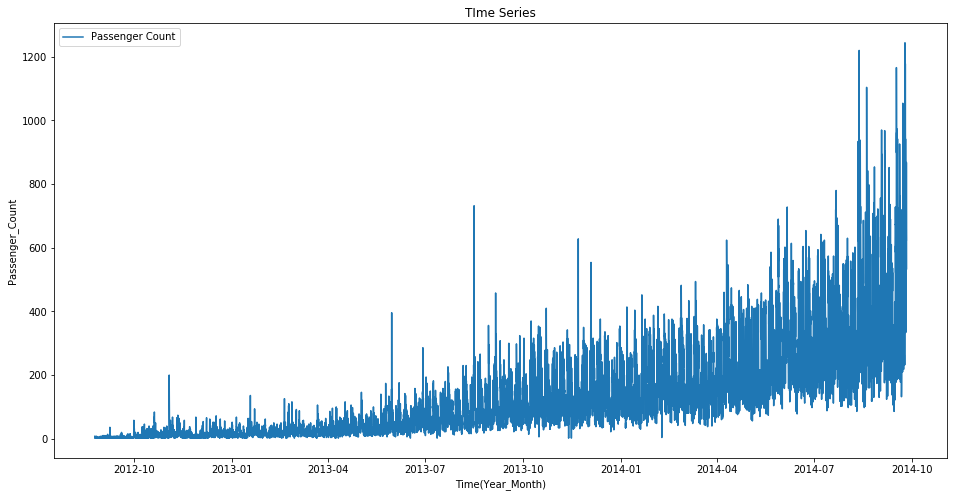

In [78]:
train.index = train['Datetime']  # indexing the Datetime to get the datetime on X axis
df=train.drop('ID',1)
ts= df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts,label='Passenger Count')
plt.title('TIme Series')
plt.xlabel("Time(Year_Month)")
plt.ylabel("Passenger_Count")
plt.legend(loc='best')


Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.

 Exploratory Analysis
Let us try to verify our hypothesis using the actual data.

Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.

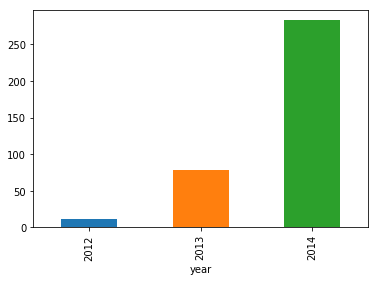

In [86]:
train.groupby('year')['Count'].mean().plot.bar()

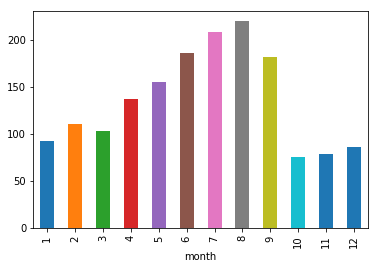

In [89]:
train.groupby('month')['Count'].mean().plot.bar()

Here we see a decrease in the mean of passenger count in last three months. This does not look right. Let’s look at the monthly mean of each year separately.

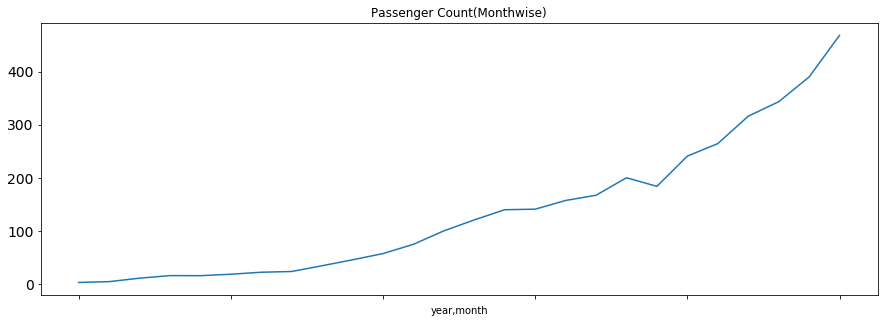

In [94]:
temp= train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5),title= "Passenger Count(Monthwise)",fontsize=14)